In [27]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential #한 방향으로 쭉 연결
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
X_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
X_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train = y_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [3]:
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]

In [4]:
original_model = Sequential()
original_model.add(Dense(16,activation='relu',input_shape=(input_shape,))) #16=다음층
original_model.add(Dense(16,activation='relu'))
original_model.add(Dense(output_shape,activation='sigmoid'))

original_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
optimizer="rmsprop" #보폭줄이며 꼼꼼히 보는데 상황도 봐가면서 
loss="binary_crossentropy"
metrics=["accuracy"]
original_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

In [6]:
epochs=20 #100문항일 때, 100문항의 문제들을 몇 번이나 반복해서 풀어보는 지
batch_size=512 #몇 문항을 풀고 해답을 맞추는 지 #100문항일 때, 배치사이즈가 100이면 전체를 다 풀고 난 뒤에 해답을 맞춰보는 것(기억용량이 커야함) #=1이면 한 문제 풀고 해답 맞춰보고 또 한 문제 풀고 맞춰보고 가중치갱신(오래걸림)
validation_data=(X_test,y_test)
original_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data) #validation_data :: loss와 model의 metrics(보통 accuracy)를 평가하기위해 사용, 6:2:2 에서 2를 차지하며 오버피팅방지 위함
#모델의 결과값과 주어진 라벨 값과의 오차를 줄이기 위해, `역전파(Backpropagation)` 알고리즘으로 가중치가 갱신 #전체 문제를 푼 뒤 해답과 맞추므로 이 때 가중치 갱신은 한 번

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4712 - accuracy: 0.8102 - val_loss: 0.3449 - val_accuracy: 0.8752
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2844 - accuracy: 0.8968 - val_loss: 0.2952 - val_accuracy: 0.8838
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2366 - accuracy: 0.9103 - val_loss: 0.3197 - val_accuracy: 0.8685
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2114 - accuracy: 0.9205 - val_loss: 0.2929 - val_accuracy: 0.8821
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1911 - accuracy: 0.9287 - val_loss: 0.3049 - val_accuracy: 0.8790
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1766 - accuracy: 0.9344 - val_loss: 0.3153 - val_accuracy: 0.8770
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1688 - accuracy: 0.9352 - val_loss: 0.3268 - val_accuracy: 0.8771
Epoch 8/20
49

In [7]:
original_model.evaluate(X_test,y_test)

782/782 [==============================] - 1s 790us/step - loss: 0.5518 - accuracy: 0.8566


[0.5518185496330261, 0.8565599918365479]

In [ ]:
결과: 20번의 학습을 통해 loss : 훈련 손실값 는 줄어들고, acc : 훈련 정확도 는 높아졌으며, val_loss : 검증 손실값 는 높아졌으며, val_acc : 검증 정확도 는 줄어들었다.

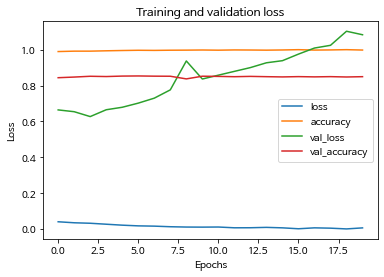

In [49]:
#original_model결과 해석을 시각화 해보기

original_model.history.history.keys()
range(len(original_model.history.history['loss']))
plt.plot(range(0,20),original_model.history.history['loss'],label='loss') #loss
plt.plot(range(0,20),original_model.history.history['accuracy'],label='accuracy')
plt.plot(range(0,20),original_model.history.history['val_loss'],label='val_loss') 
plt.plot(range(0,20),original_model.history.history['val_accuracy'],label='val_accuracy')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 

In [39]:
#모델 작게 해보기 #6
small_model = Sequential()
small_model.add(Dense(6,activation='relu',input_shape=(input_shape,)))
small_model.add(Dense(6,activation='relu'))
small_model.add(Dense(output_shape,activation='sigmoid'))

optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
small_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

epochs=20
batch_size=512
validation_data=(X_test,y_test)
small_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

Epoch 1/20
49/49 [==============================] - 2s 27ms/step - loss: 0.5942 - accuracy: 0.6933 - val_loss: 0.5312 - val_accuracy: 0.7912
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4924 - accuracy: 0.8389 - val_loss: 0.4829 - val_accuracy: 0.8458
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.4474 - accuracy: 0.8870 - val_loss: 0.4594 - val_accuracy: 0.8742
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4192 - accuracy: 0.9058 - val_loss: 0.4540 - val_accuracy: 0.8648
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3980 - accuracy: 0.9175 - val_loss: 0.4407 - val_accuracy: 0.8779
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3792 - accuracy: 0.9274 - val_loss: 0.4479 - val_accuracy: 0.8676
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3632 - accuracy: 0.9327 - val_loss: 0.4308 - val_accuracy: 0.8762
Epoch 8/20
49

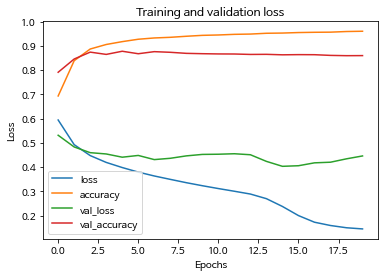

In [48]:
#small_model결과 해석을 시각화 해보기
small_model.history.history.keys()
range(len(small_model.history.history['loss']))
plt.plot(range(0,20),small_model.history.history['loss'],label='loss') #loss
plt.plot(range(0,20),small_model.history.history['accuracy'],label='accuracy')
plt.plot(range(0,20),small_model.history.history['val_loss'],label='val_loss') 
plt.plot(range(0,20),small_model.history.history['val_accuracy'],label='val_accuracy')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() #오버피팅나니깐 언더피팅해주자

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.9355 - accuracy: 0.7792 - val_loss: 0.6845 - val_accuracy: 0.8363
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.6324 - accuracy: 0.8454 - val_loss: 0.6020 - val_accuracy: 0.8412
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.5627 - accuracy: 0.8578 - val_loss: 0.5483 - val_accuracy: 0.8601
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.5376 - accuracy: 0.8616 - val_loss: 0.5304 - val_accuracy: 0.8621
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.5173 - accuracy: 0.8679 - val_loss: 0.5180 - val_accuracy: 0.8657
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.5100 - accuracy: 0.8688 - val_loss: 0.5110 - val_accuracy: 0.8663
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4983 - accuracy: 0.8733 - val_loss: 0.5129 - val_accuracy: 0.8635
Epoch 8/20
49

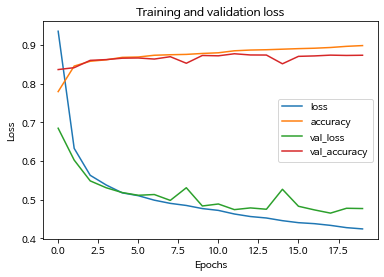

In [50]:
#overfitting을 방지 >> Regularization :: L1 regularization   #이상치가 적당히 무시되길 원할 때 #L1은 경우에 따라 특정 feature(vertor의 요소) 없이도 같은 값

from keras import regularizers
from keras.regularizers import l1 #l1을 regularizers로 씀

l1_model = Sequential()
l1_model.add(Dense(16,activation='relu',kernel_regularizer=l1(0.001),input_shape=(input_shape,)))
l1_model.add(Dense(16,activation='relu',kernel_regularizer=l1(0.001)))
l1_model.add(Dense(output_shape,activation='sigmoid'))

optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
l1_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

epochs=20
batch_size=512
validation_data=(X_test,y_test)
l1_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

#l1_model 결과 해석을 시각화 해보기
l1_model.history.history.keys()
range(len(l1_model.history.history['loss']))
plt.plot(range(0,20),l1_model.history.history['loss'],label='loss') #loss
plt.plot(range(0,20),l1_model.history.history['accuracy'],label='accuracy')
plt.plot(range(0,20),l1_model.history.history['val_loss'],label='val_loss') 
plt.plot(range(0,20),l1_model.history.history['val_accuracy'],label='val_accuracy')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() #오버피팅나니깐 언더피팅해주자

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.4945 - accuracy: 0.8190 - val_loss: 0.3950 - val_accuracy: 0.8628
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3269 - accuracy: 0.8954 - val_loss: 0.3299 - val_accuracy: 0.8860
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2851 - accuracy: 0.9091 - val_loss: 0.3244 - val_accuracy: 0.8858
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2690 - accuracy: 0.9148 - val_loss: 0.3280 - val_accuracy: 0.8842
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2600 - accuracy: 0.9177 - val_loss: 0.3330 - val_accuracy: 0.8821
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2505 - accuracy: 0.9225 - val_loss: 0.3756 - val_accuracy: 0.8650
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2489 - accuracy: 0.9216 - val_loss: 0.3774 - val_accuracy: 0.8667
Epoch 8/20
49

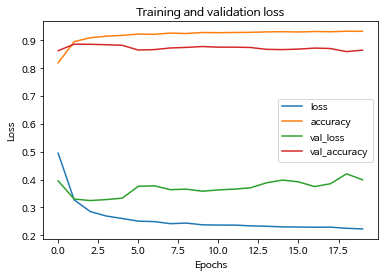

In [51]:
#overfitting을 방지 >> Regularization :: L2 regularization   #이상치의 등장에 주의를 기울여야 할 때 # L2는 각 vector에 대해 unique한 값이 출력

from keras import regularizers
from keras.regularizers import l2 #l2을 regularizers로 씀

l2_model = Sequential()
l2_model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001),input_shape=(input_shape,)))
l2_model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001)))
l2_model.add(Dense(output_shape,activation='sigmoid'))

optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
l2_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

epochs=20
batch_size=512
validation_data=(X_test,y_test)
l2_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

#l2_model 결과 해석을 시각화 해보기
l2_model.history.history.keys()
range(len(l2_model.history.history['loss']))
plt.plot(range(0,20),l2_model.history.history['loss'],label='loss') #loss
plt.plot(range(0,20),l2_model.history.history['accuracy'],label='accuracy')
plt.plot(range(0,20),l2_model.history.history['val_loss'],label='val_loss') 
plt.plot(range(0,20),l2_model.history.history['val_accuracy'],label='val_accuracy')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() #오버피팅나니깐 언더피팅해주자

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.5849 - accuracy: 0.7008 - val_loss: 0.4353 - val_accuracy: 0.8638
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4457 - accuracy: 0.8154 - val_loss: 0.3436 - val_accuracy: 0.8818
Epoch 3/20
49/49 [==============

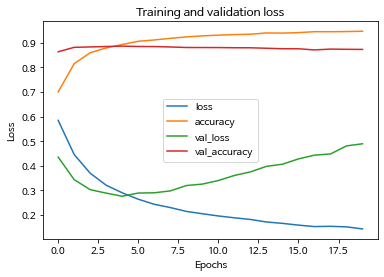

In [52]:
#overfitting을 방지 >> Regularization :: Dropout

from keras import regularizers
from keras.layers import Dropout 

drout_model = Sequential()
drout_model.add(Dense(16,activation='relu',input_shape=(input_shape,)))
drout_model.add(Dropout(0.5))
drout_model.add(Dense(16,activation='relu'))
drout_model.add(Dropout(0.5))
drout_model.add(Dense(output_shape,activation='sigmoid'))

original_model.summary()
# drout_model.weight #확인

optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
drout_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

epochs=20
batch_size=512
validation_data=(X_test,y_test)
drout_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

#drout_model 결과 해석을 시각화 해보기
drout_model.history.history.keys()
range(len(drout_model.history.history['loss']))
plt.plot(range(0,20),drout_model.history.history['loss'],label='loss') #loss
plt.plot(range(0,20),drout_model.history.history['accuracy'],label='accuracy')
plt.plot(range(0,20),drout_model.history.history['val_loss'],label='val_loss') 
plt.plot(range(0,20),drout_model.history.history['val_accuracy'],label='val_accuracy')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() #오버피팅나니깐 언더피팅해주자